# How to Use Stable Diffusion to Generate Images (CPU)

In this Colab notebook, we will see how to set up and run Stable Diffusion on Linux in order to generate images from a textual caption.

This tutorial does **not** require a GPU - if you would like the see the equivalent notebook for GPUs (for example, if you have Colab Pro), see the [related notebook](https://colab.research.google.com/drive/1uWCe41_BSRip4y4nlcB8ESQgKtr5BfrN?usp=sharing). Note that image generation will be much faster with a GPU.

See [How to Run Stable Diffusion Locally to Generate Images](www.assemblyai.com/blog/how-to-run-stable-diffusion-locally-to-generate-images/) to learn how to use Stable Diffusion on your local machine.

# Setup

## a) Download the Repository

First, we need to download the Stable Diffusion source code. We will be using a fork that accommodates CPU inference.

In [ ]:
!git clone https://github.com/bes-dev/stable_diffusion.openvino.git
import os
os.chdir('stable_diffusion.openvino')

fatal: destination path 'stable_diffusion.openvino' already exists and is not an empty directory.


## b) Install Requirements

The `requirements.txt` file specifies Scipy version 1.9.0 is required, but it is not compatible with the Colab default Python version 3.7. Rather than change the Python version, we simply downgrade Scipy to version 1.7.3. which is compatible with Colab's version of Python and still works with this fork of Stable Diffusion.

Change the version of Scipy in the requirements file by running the below cell

In [ ]:
with open("requirements.txt", "r") as f:
  d = f.read()

d = d.replace("scipy==1.9.0", "scipy==1.7.3")

with open("requirements.txt", "w") as f:
  f.write(d)

Now we can install the requirements with the below command. You can ignore the final output warning.

In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.8 MB 2.1 MB/s 
     |████████████████████████████████| 60.5 MB 1.2 MB/s 
     |████████████████████████████████| 3.5 MB 53.6 MB/s 
     |████████████████████████████████| 112 kB 70.3 MB/s 
     |████████████████████████████████| 78 kB 6.6 MB/s 
     |████████████████████████████████| 26.1 MB 1.2 MB/s 
     |████████████████████████████████| 120 kB 76.8 MB/s 
     |████████████████████████████████| 38.1 MB 1.1 MB/s 
     |████████████████████████████████| 9.1 MB 25.1 MB/s 
     |████████████████████████████████| 78 kB 7.2 MB/s 
     |████████████████████████████████| 53 kB 1.6 MB/s 
     |████████████████████████████████| 880 kB 65.5 MB/s 
     |████████████████████████████████| 757 kB 67.2 MB/s 
     |████████████████████████████████| 40 kB 5.3 MB/s 
     |████████████████████████████████| 7.0 MB 62.4 MB/s 
     |████████████████████████████████|

## C) Download the Model Weights

Now it's time to download the weights for the model. Do so with the below command, making sure to read and accept [the license](https://github.com/CompVis/stable-diffusion/blob/main/LICENSE) beforehand:

In [ ]:
!curl https://f004.backblazeb2.com/file/aai-blog-files/sd-v1-4.ckpt > sd-v1-4.ckpt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4067M  100 4067M    0     0   176M      0  0:00:23  0:00:23 --:--:--  180M


# Generating Images with Stable Diffusion (CPU)

Now that everything is installed, we are prepared to generate images with Stable Diffusion. To generate an image, simply run the below command, changing the prompt to whatever you want. The inference time will be high at around 8-12 minutes, so feel free to grab a cup of coffee while Stable Diffusion runs.


In [ ]:
!python demo.py --prompt "bright beautiful solarpunk landscape, photorealism"

Downloading: 100% 905/905 [00:00<00:00, 972kB/s]
Downloading: 100% 939k/939k [00:01<00:00, 833kB/s] 
Downloading: 100% 512k/512k [00:00<00:00, 546kB/s]
Downloading: 100% 389/389 [00:00<00:00, 248kB/s]
Downloading: 100% 2.12M/2.12M [00:01<00:00, 1.65MB/s]
Downloading: 100% 464k/464k [00:00<00:00, 483kB/s]
Downloading: 100% 492M/492M [00:25<00:00, 19.4MB/s]
Downloading: 100% 3.02M/3.02M [00:01<00:00, 2.22MB/s]
Downloading: 100% 3.44G/3.44G [02:58<00:00, 19.3MB/s]
tcmalloc: large alloc 3438092288 bytes == 0x55b39cd66000 @  0x7fe743eda1e7 0x7fe722c3a3f6 0x7fe7229011e3 0x7fe6add17944 0x7fe722dc949c 0x7fe722a2b6e5 0x7fe722996305 0x7fe72331795e 0x7fe723347d0e 0x55b36ba257a4 0x55b36ba5b140 0x55b36ba5bbd1 0x55b36baa3702 0x55b36b9f4e85 0x55b36b9f683e 0x55b36ba620ff 0x55b36ba5b3fc 0x55b36ba5bbd1 0x55b36baa03a1 0x55b36ba148d7 0x55b36ba9f395 0x55b36b9f4e85 0x55b36b9f6273 0x55b36bb03c82 0x55b36bb0de1e 0x55b36bb0e00b 0x55b36bb0f0fa 0x55b36bb0f18c 0x7fe743113c87 0x55b36bab403a
Downloading: 100% 329k/3

You can view the generated image with the below command:

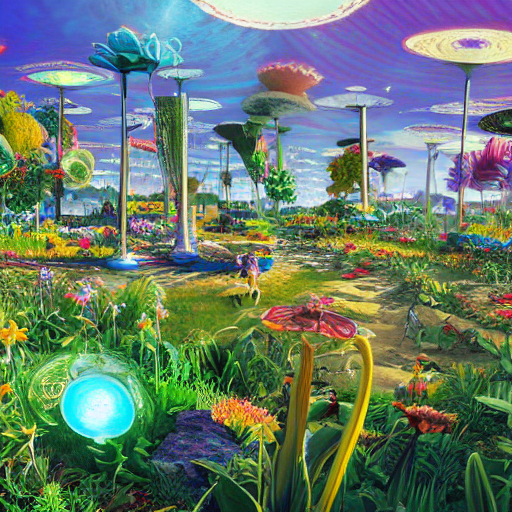

In [ ]:
from IPython.display import Image
Image('/content/stable_diffusion.openvino/output.png')

# Downloading Images

You can download the generated image with the below command:

In [ ]:
from google.colab import files as FILE
FILE.download("/content/stable_diffusion.openvino/output.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

To run another prompt, simply start at the **Generating Images with Stable Diffusion (CPU)** section and follow along as before!

# Final Words

That's all it takes to generate images using the new Stable Diffusion model - don't forget to share your fun creations with us on [Twitter](https://twitter.com/AssemblyAI)! If you want to learn more about how Stable Diffusion works, you can check out our [Introduction to Diffusion Models for Machine Learning](https://www.assemblyai.com/blog/diffusion-models-for-machine-learning-introduction/) article. If you enjoyed this article, feel free to check out more of our [blog](https://www.assemblyai.com/blog/) or [YouTube channel](https://www.youtube.com/c/AssemblyAI) for Machine Learning content, or feel free to [follow our newsletter](https://assemblyai.us17.list-manage.com/subscribe?u=cb9db7b18b274c2d402a56c5f&id=2116bf7c68) to stay in the loop for new releases.